## Dataset Labeler Tool 
A simple interface for categorizing images into labeled folders in ipynb. Useful for quickly prepping categorical image data for deep learning / ML.  
Be sure to run each cell.

1️⃣. First create a list of the Categories to separate into.  
<span style="font-size:0.8em;">It may be helpful to include a "Trash" grouping for images that are outside of scope.</span>  

In [1]:
categories = ["Interior", "Exterior", "Trash"]

2️⃣. Select the input and output folders

In [ ]:
import ipywidgets as widgets
import os
input = widgets.Dropdown(options=[x for x in os.listdir() if "." not in x], # folders with "." are excluded
                        description="Input folder:",)
output = widgets.Dropdown(options=[x for x in os.listdir() if "." not in x], # folders with "." are excluded
                        description="Out Folder:",)
display(widgets.VBox([input, output]))

3️⃣. Prepare output folders (creates folders for categories that are not present)

In [ ]:
for fold in [x for x in categories if x not in [x for x in os.listdir(output.value) if "." not in x]]:
    os.mkdir(output.value + "/" + fold)

4️⃣. Sort

In [ ]:
def nextpic():
    global imgpos
    imgpos+=1
    imgframe.value = open(input.value + "/" + piclist[imgpos],"rb").read()

def send2folder(fold):
    global foldlist
    foldlist.append(fold)
    os.rename(input.value + "/" + piclist[imgpos], output.value + "/" + fold + "/" + piclist[imgpos])
    nextpic()

def oopsgoback1(_a):
    global imgpos, foldlist
    imgpos-=1
    os.rename(output.value + "/" + foldlist.pop() + "/" + piclist[imgpos], input.value + "/" + piclist[imgpos])
    imgframe.value = open(input.value + "/" + piclist[imgpos],"rb").read()

piclist = [x for x in os.listdir(input.value) if "." in x]
global foldlist, imgpos
foldlist = []
imgpos=0

image0 = open(input.value + "/" + piclist[0],"rb").read()
imgframe = widgets.Image(value=image0
                        , width=300 
                        # , height=300
                        )

butlist = [widgets.Button(description=cat, button_style="danger") for cat in categories]
[button.on_click(lambda x, imgpos=cat: send2folder(imgpos)) for button, cat in zip(butlist, categories)]

oopsbutton = widgets.Button(description="Take me back", button_style="warning")
oopsbutton.on_click(oopsgoback1())

display(widgets.HBox(butlist), imgframe, oopsbutton)

📂
Example of loading in the now sorted data using fastai

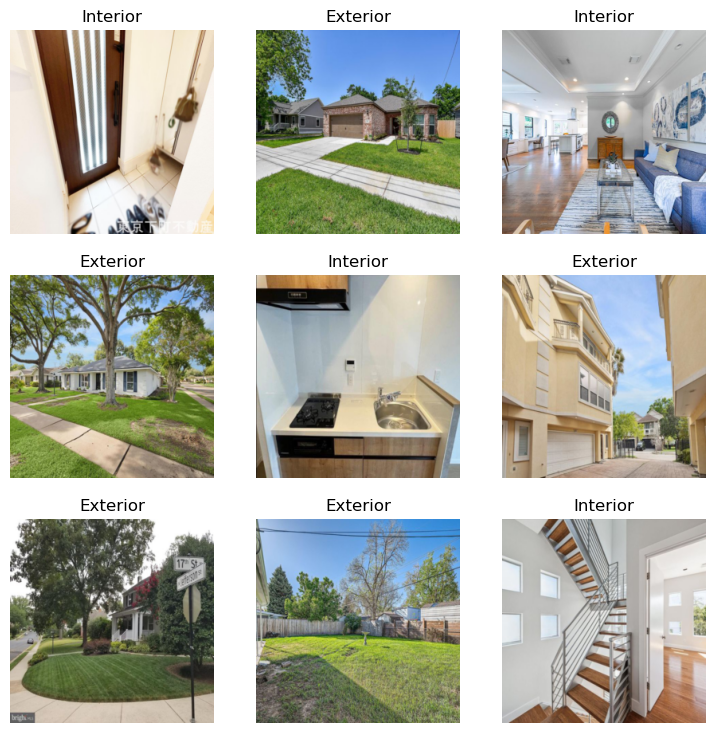

In [7]:
from fastai.data.all import *
from fastai.vision.all import *
fp = Path(".")
DataBlock(blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        get_y=parent_label,
        # splitter=RandomSplitter(valid_pct=0.25),
        item_tfms=[Resize(256, method="squish")]
).dataloaders(fp).show_batch(max_n=9)